# Benchmarcks and plots of SVM DDPG optim envs

In [1]:
import numpy as np
import os
import glob
import pickle
from collections import deque

import matplotlib
import matplotlib.pyplot as plt
import itertools
from matplotlib import cm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
%load_ext autoreload
%autoreload 2
from IPython import get_ipython

In [34]:
## All the data stored in the run folder file
run = 'run_8/'
name_dir = 'runs_optim_envs/'+run

## print info of this run
info = pickle.load(open(name_dir+'info.p', 'rb'))
for k in info.keys():
    print(k, ' : ', info[k])

alg  :  DDPG
env  :  svmEnv-v2
basis_size  :  250
batch_size  :  64
bootstrap_size  :  5
gamma  :  0.99
tau  :  0.001
lr_critic  :  0.0001
lr_actor  :  0.0001
update_every  :  1
transfer_every  :  1
num_update  :  1
add_noise_every  :  1


In [35]:
## Example of data stored and number of episodes
rew_files = name_dir+'rew*'
num_ep = len(glob.glob(rew_files))
print('The number of episodes is then:', num_ep)

The number of episodes is then: 600


The max score is at episode 97 and is equal to 1993.75229643213
The min score is at episode 3 and is equal to 19.994242132413746


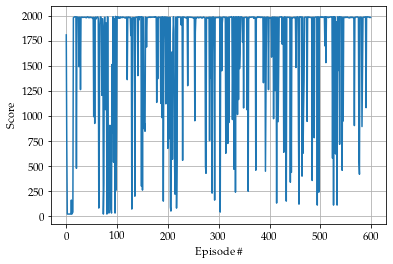

In [36]:
## Score data analysis
scores = np.zeros(num_ep)
for i in range(num_ep):
    rew = pickle.load(open(name_dir+f'rew_{i}.p', 'rb'))
    scores[i] = np.sum(rew)
    
## Max and min
index_max = np.argmax(scores)
index_min = np.argmin(scores)
print(f'The max score is at episode {index_max} and is equal to {scores[index_max]}')
print(f'The min score is at episode {index_min} and is equal to {scores[index_min]}')
    
## Plot scores
plt.rcParams.update({'font.size': 11})
plt.grid(True)
plt.ylabel('Score')
plt.xlabel('Episode \#')
plt.plot(np.arange(len(scores)), scores)
plt.savefig('./graphs/scores_ddpg_optim_ken.pdf', format='pdf', dpi=1000)

The min en (BEST CASE) is at episode 7 and is equal to -0.1504250019788742
[-0.150425, -0.150425]
The max en (WORST CASE) is at episode 351 and is equal to -0.14321400225162506
[-0.148919, -0.15021, -0.147823, -0.149604, -0.148956, -0.150414, -0.150231, -0.149778, -0.150324, -0.149537, -0.148473, -0.147407, -0.146603, -0.146934, -0.148396, -0.148741, -0.150149, -0.149899, -0.149802, -0.148846, -0.147458, -0.145382, -0.147615, -0.150344, -0.14801, -0.148539, -0.150185, -0.148926, -0.150296, -0.149397, -0.143642, -0.150235, -0.150112, -0.150133, -0.150381, -0.150281, -0.150287, -0.149847, -0.150224, -0.150135, -0.149959, -0.148653, -0.150155, -0.149248, -0.150367, -0.150315, -0.149133, -0.150289, -0.150037, -0.150091, -0.150195, -0.150301, -0.149904, -0.150274, -0.150387, -0.150103, -0.150352, -0.149423, -0.150296, -0.149904, -0.148385, -0.148618, -0.14982, -0.150347, -0.14806, -0.14631, -0.148699, -0.147355, -0.149994, -0.150008, -0.149701, -0.150161, -0.150183, -0.147202, -0.148408, -0

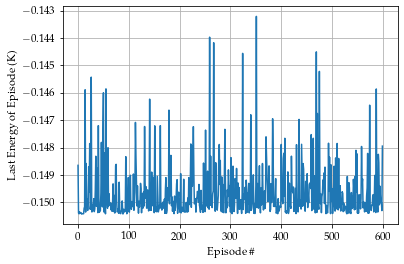

In [37]:
## Energies data analysis
last_en_per_ep = np.zeros(num_ep)
for i in range(num_ep):
    en_ep = pickle.load(open(name_dir+f'en_{i}.p', 'rb'))
    last_en_per_ep[i] = en_ep[-1]
    
## Max and min
index_min = np.argmin(last_en_per_ep)
index_max = np.argmax(last_en_per_ep)
print(f'The min en (BEST CASE) is at episode {index_min} and is equal to {last_en_per_ep[index_min]}')
print(pickle.load(open(name_dir+f'en_{index_min}.p', 'rb')))
print(f'The max en (WORST CASE) is at episode {index_max} and is equal to {last_en_per_ep[index_max]}')
print(pickle.load(open(name_dir+f'en_{index_max}.p', 'rb')))
    
## Plot energies 
plt.rcParams.update({'font.size': 11})
plt.grid(True)
plt.ylabel('Last Energy of Episode (K)')
plt.xlabel('Episode \#')
plt.plot(np.arange(len(last_en_per_ep)), last_en_per_ep)
plt.savefig('./graphs/energies_ddpg_optim_ken.pdf', format='pdf', dpi=1000)

The biggest pri dim (BEST CASE) is at episode 2 and is equal to 177.0
[181, 177]
The max en (WORST CASE) is at episode 405 and is equal to 86.0
[94, 105, 111, 104, 102, 114, 111, 101, 104, 104, 112, 110, 108, 97, 116, 103, 107, 102, 102, 112, 106, 103, 100, 106, 102, 106, 104, 101, 107, 110, 101, 119, 116, 119, 114, 115, 121, 120, 107, 112, 104, 111, 112, 114, 112, 108, 97, 101, 113, 96, 100, 114, 119, 108, 115, 110, 107, 105, 105, 108, 102, 101, 109, 106, 96, 107, 101, 97, 102, 111, 103, 107, 111, 107, 104, 106, 107, 109, 106, 113, 112, 111, 104, 111, 103, 112, 114, 107, 106, 94, 99, 90, 98, 104, 99, 103, 94, 98, 103, 102, 104, 104, 104, 108, 107, 102, 99, 104, 113, 105, 103, 101, 106, 112, 102, 105, 107, 106, 112, 118, 116, 96, 94, 93, 110, 113, 106, 113, 112, 114, 113, 113, 104, 109, 108, 99, 104, 113, 110, 98, 106, 114, 101, 105, 104, 101, 110, 104, 104, 105, 107, 107, 105, 115, 109, 110, 110, 94, 106, 110, 104, 101, 104, 104, 102, 105, 96, 91, 94, 105, 96, 92, 91, 99, 97, 100, 99,

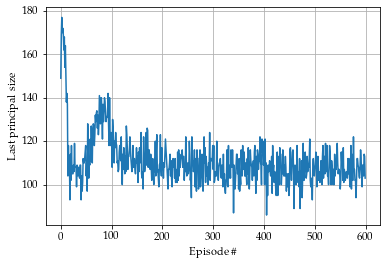

In [38]:
## Pri dims data analysis
last_pri_per_ep = np.zeros(num_ep)
for i in range(num_ep):
    pri_ep = pickle.load(open(name_dir+f'pri_dim_{i}.p', 'rb'))
    last_pri_per_ep[i] = pri_ep[-1]
    
## Max and min
index_max = np.argmax(last_pri_per_ep)
index_min = np.argmin(last_pri_per_ep)
print(f'The biggest pri dim (BEST CASE) is at episode {index_max} and is equal to {last_pri_per_ep[index_max]}')
print(pickle.load(open(name_dir+f'pri_dim_{index_max}.p', 'rb')))
print(f'The max en (WORST CASE) is at episode {index_min} and is equal to {last_pri_per_ep[index_min]}')
print(pickle.load(open(name_dir+f'pri_dim_{index_min}.p', 'rb')))
    
## Plot pri dims
plt.rcParams.update({'font.size': 11})
plt.grid(True)
plt.ylabel('Last principal size')
plt.xlabel('Episode \#')
plt.plot(np.arange(len(last_pri_per_ep)), last_pri_per_ep)
plt.savefig('./graphs/pri_dim_ddpg_optim_ken.pdf', format='pdf', dpi=1000)

In [ ]:
## Rewards of episode with max score
file_rew_max = name_dir+f'rew_{index_max}.p'
rew_max = pickle.load(open(file_rew_max, 'rb'))

## Plot rew of ep with max score
plt.rcParams.update({'font.size': 11})
plt.plot(np.arange(len(rew_max)), rew_max)
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(rew_max))

In [ ]:
## Plot energies of episode with max score
file_en_max = name_dir+f'en_{index_max}.p'
en_max = pickle.load(open(file_en_max, 'rb'))

## Plot energies of ep with max score
plt.rcParams.update({'font.size': 11})
plt.plot(np.arange(len(en_max)), en_max)
plt.ylabel('Energy')
plt.xlabel('Step #')

print('The last energy of the episode with max score is = ', en_max[-1])

In [ ]:
## Plot princip dim of episode with max score

file_pri_max = name_dir+f'pri_dim_{index_max}.p'
pri_max = pickle.load(open(file_pri_max, 'rb'))

## Plot rew of pri dims with max score
plt.rcParams.update({'font.size': 11})
plt.plot(np.arange(len(pri_max)), pri_max)
plt.ylabel('Pri dims')
plt.xlabel('Step #')

print('The last prin dim of the episode with max score is = ', pri_max[-1])

In [ ]:
## Plot full dim of episode with max score

file_full_max = name_dir+f'full_dim_{index_max}.p'
full_max = pickle.load(open(file_full_max, 'rb'))

## Plot full dim of ep with max score
plt.rcParams.update({'font.size': 11})
plt.plot(np.arange(len(full_max)), full_max)
plt.ylabel('Full dims')
plt.xlabel('Step #')

print('The last full dim of the episode with max score is = ', full_max[-1])

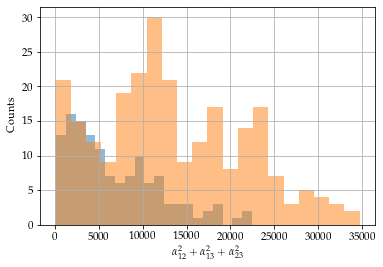

In [32]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

file_sigmas_max = name_dir+f'sigmas_{index_max}.p'
sigmas_rl = pickle.load(open(file_sigmas_max, 'rb'))[-1]
sigmas_rl = sigmas_rl * 109/2 + 111/2

sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

## Plot sigmas of ep with max score
plt.rcParams.update({'font.size': 11})
plt.grid(True)
plt.ylabel('Counts')
plt.xlabel('$\\alpha_{12}^2 + \\alpha_{13}^2 + \\alpha_{23}^2$')
plt.hist(sigmas_random_squared, bins=20, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=20, alpha=0.5)
plt.savefig('./graphs/sigmas_max_ddpg_optim_den.pdf', format='pdf', dpi=1000)

This episode collected a score of =  1984.1999384749593


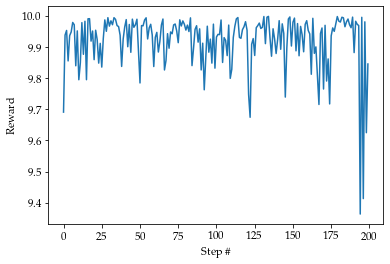

In [22]:
## Rewards of episode with min score
file_rew_min = name_dir+f'rew_{index_min}.p'
rew_min = pickle.load(open(file_rew_min, 'rb'))

## Plot rew of ep with min score
plt.rcParams.update({'font.size': 11})
plt.plot(np.arange(len(rew_min)), rew_min)
plt.ylabel('Reward')
plt.xlabel('Step \#')

print('This episode collected a score of = ', np.sum(rew_min))

In [ ]:
## Plot energies of episode with min score
file_en_min = name_dir+f'en_{index_min}.p'
en_min = pickle.load(open(file_en_min, 'rb'))

## Plot energies of ep with min score
plt.rcParams.update({'font.size': 11})
plt.plot(np.arange(len(en_min)), en_min)
plt.ylabel('Energy (K)')
plt.xlabel('Step #')

print('The last energy of the episode with min score is = ', en_min[-1])

In [ ]:
## Plot princip dim of episode with min score

file_pri_min = name_dir+f'pri_dim_{index_min}.p'
pri_min = pickle.load(open(file_pri_min, 'rb'))

## Plot pri dims of ep with min score
plt.rcParams.update({'font.size': 11})
plt.plot(np.arange(len(pri_min)), pri_min)
plt.ylabel('Pri dims')
plt.xlabel('Step #')

print('The last prin dim of the episode with min score is = ', pri_min[-1])

In [ ]:
## Plot full dim of episode with min score

file_full_min = name_dir+f'full_dim_{index_min}.p'
full_min = pickle.load(open(file_full_min, 'rb'))

## Plot full dim of ep with min score
plt.rcParams.update({'font.size': 11})
plt.plot(np.arange(len(full_min)), full_min)
plt.ylabel('Full dims')
plt.xlabel('Step #')

print('The last full dim of the episode with max score is = ', full_min[-1])

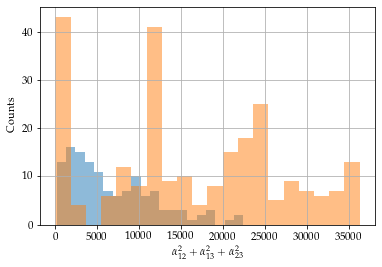

In [33]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

file_sigmas_min = name_dir+f'sigmas_{index_min}.p'
sigmas_rl = pickle.load(open(file_sigmas_min, 'rb'))[-1]
sigmas_rl = sigmas_rl * 109/2 + 111/2

sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

## Plot sigmas of ep with min score
plt.rcParams.update({'font.size': 11})
plt.grid(True)
plt.ylabel('Counts')
plt.xlabel('$\\alpha_{12}^2 + \\alpha_{13}^2 + \\alpha_{23}^2$')
plt.hist(sigmas_random_squared, bins=20, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=20, alpha=0.5)
plt.savefig('./graphs/sigmas_min_ddpg_optim_den.pdf', format='pdf', dpi=1000)